In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv("/content/twitter_training.csv",header=None,names=["tweet_id", "entity", "sentiment", "text"])

In [ ]:
df.head()

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.shape

(74682, 4)

Data Preprocessing

In [ ]:
nltk.download("punkt")      # needed for tokenization
nltk.download("punkt_tab")  # this is the new requirement in recent NLTK versions
nltk.download("stopwords")  # list of common stopwords
nltk.download("wordnet")    # needed for lemmatization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words("english"))  #stores all common English stopwords for quick checking.

lemmatizer=WordNetLemmatizer()

In [ ]:
def preprocess_tweet(text):
    # 1. Remove URLs (http, https, www links)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 2. Remove mentions (@username) and hashtags (#topic)
    text = re.sub(r'@\w+|#\w+', '', text)

    # 3. Remove emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # 4. Remove punctuation (.,!? etc.)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Convert all text to lowercase
    text = text.lower()

    # 6. Tokenize the text (split into individual words)
    tokens = word_tokenize(text)

    # 7. Keep only alphabetic words and remove stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # 8. Lemmatize each word (convert to base form: running -> run)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 9. Return the cleaned tokens
    return tokens


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values in the 'text' column with empty strings
df['text'] = df['text'].fillna('')

# 1️⃣ Preprocess and join tokens into a single string
clean_tweets = [" ".join(preprocess_tweet(tweet)) for tweet in df["text"]]

# 2️⃣ Create TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer()

# 3️⃣ Fit and transform
X_tfidf = vectorizer_tfidf.fit_transform(clean_tweets)

# 4️⃣ Show vocabulary and TF-IDF values (optional, for inspection)
# print("Vocabulary:", vectorizer_tfidf.get_feature_names_out())
# print("TF-IDF matrix:\n", X_tfidf.toarray())

TRAIN MODEL

In [ ]:
X = X_tfidf
y = df["sentiment"]  # replace with your actual label column name

# 2️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}



===== Logistic Regression =====
Accuracy:  0.7438
Precision: 0.7450
Recall:    0.7438
F1-score:  0.7423

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.77      0.60      0.67      2592
    Negative       0.77      0.81      0.79      4519
     Neutral       0.69      0.73      0.71      3596
    Positive       0.75      0.78      0.76      4230

    accuracy                           0.74     14937
   macro avg       0.74      0.73      0.73     14937
weighted avg       0.75      0.74      0.74     14937



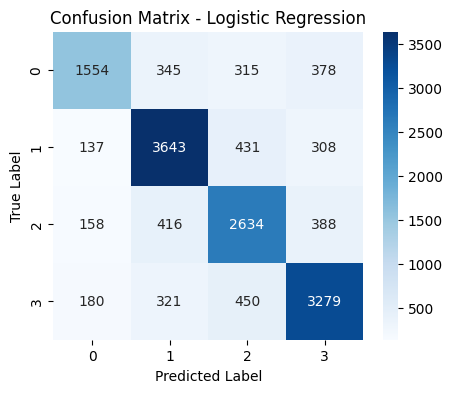


===== Naive Bayes =====
Accuracy:  0.6884
Precision: 0.7312
Recall:    0.6884
F1-score:  0.6734

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.35      0.50      2592
    Negative       0.62      0.89      0.73      4519
     Neutral       0.78      0.56      0.65      3596
    Positive       0.68      0.80      0.73      4230

    accuracy                           0.69     14937
   macro avg       0.75      0.65      0.66     14937
weighted avg       0.73      0.69      0.67     14937



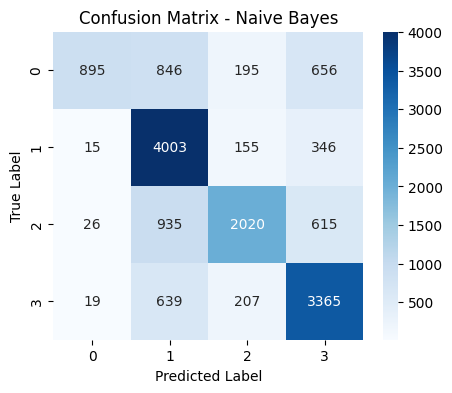


===== Random Forest =====
Accuracy:  0.8913
Precision: 0.8950
Recall:    0.8913
F1-score:  0.8915

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.81      0.88      2592
    Negative       0.91      0.91      0.91      4519
     Neutral       0.82      0.92      0.87      3596
    Positive       0.90      0.89      0.90      4230

    accuracy                           0.89     14937
   macro avg       0.90      0.88      0.89     14937
weighted avg       0.90      0.89      0.89     14937



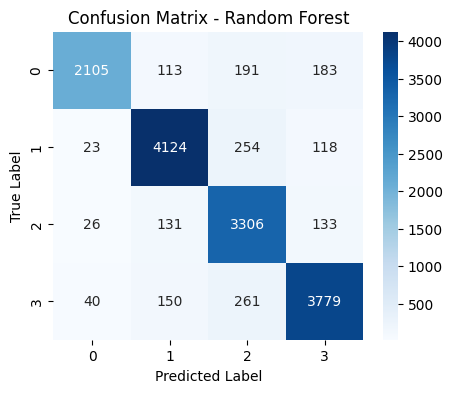

In [ ]:
for name, model in models.items():
    print(f"\n===== {name} =====")

    # Predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
import joblib

# After training
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer_tfidf, "tfidf_vectorizer.pkl")

# Download to your computer
from google.colab import files
files.download("sentiment_model.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>